<a href="https://colab.research.google.com/github/deepintomlf/mlfbook/blob/master/Chapter4_TreeModels/%E6%A0%91%E6%A8%A1%E5%9E%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Loss function for a classification tree


1.  Mis-classification error
2.  Gini index
3.  Cross-entropy





/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


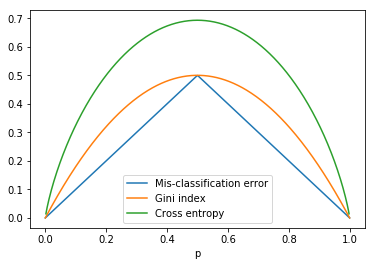

In [0]:
import numpy as np
p_vec = np.linspace(0.0, 1.0, num=500)
mis_cl_error_vec = np.minimum(1-p_vec, p_vec)
gini_vec = 2*np.multiply(p_vec, 1-p_vec)
#p_vec = p_vec[1:-1]
cross_entropy_vec = -np.multiply(p_vec, np.log(p_vec))- np.multiply(1-p_vec, np.log(1-p_vec))
import matplotlib.pyplot as plt
plt.plot(p_vec, mis_cl_error_vec, '-')
plt.plot(p_vec, gini_vec, '-')
plt.plot(p_vec, cross_entropy_vec)
plt.legend(['Mis-classification error', 'Gini index', 'Cross entropy'] )
plt.xlabel('p')
plt.grid('off')
plt.savefig('LossFuncTree.png')

## 决策树

In [32]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# 加载Iris数据集
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.33, random_state=0)

# 构建决策树分类器
clf_dt = DecisionTreeClassifier(max_depth = 3, criterion = 'gini', random_state=0)
clf_dt = clf_dt.fit(X_train, y_train) 
y_test_est = clf_dt.predict(X_test)

[0.         0.         0.40929056 0.59070944]


In [33]:
# 输出混淆矩阵
pd.crosstab(y_test, y_test_est, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,0,1,2
Actual Species,,,
0,16,0,0
1,0,18,1
2,0,0,15


In [34]:
# 查看特征重要性
print(clf_dt.feature_importances_)

[0.         0.         0.40929056 0.59070944]


In [0]:
# 安装graphviz
!pip install graphviz

In [29]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(clf_dt, out_file=None, feature_names=iris.feature_names, 
                                class_names=iris.target_names, filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("iris") 

'iris.png.pdf'

In [28]:
import os
print( os.getcwd() )
from google.colab import files
files.download("/content/iris.pdf" ) 

/content


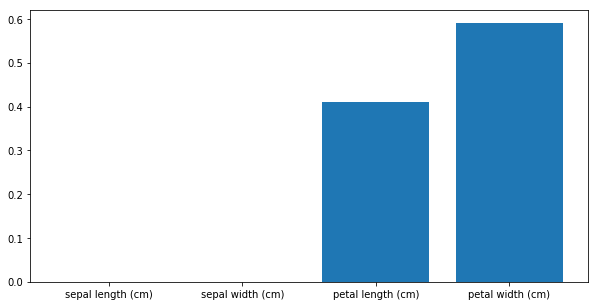

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(iris.feature_names, clf_dt.feature_importances_)
plt.show()

## 随机森林




In [0]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# 构建随机森林
clf_rf = RandomForestClassifier(n_estimators = 20, max_depth = 3, criterion = 'gini', n_jobs=2, random_state=0)
clf_rf = clf_rf.fit(X_train, y_train)
y_test_est_rf = clf_rf.predict(X_test)

In [81]:
 clf_rf.predict_proba(X_test)[0:10]

array([[0.        , 0.04109848, 0.95890152],
       [0.0016129 , 0.96141246, 0.03697464],
       [0.9       , 0.1       , 0.        ],
       [0.        , 0.04859117, 0.95140883],
       [1.        , 0.        , 0.        ],
       [0.        , 0.00414673, 0.99585327],
       [1.        , 0.        , 0.        ],
       [0.0016129 , 0.97252357, 0.02586353],
       [0.0016129 , 0.89752357, 0.10086353],
       [0.0016129 , 0.96141246, 0.03697464]])

In [82]:
# 输出混淆矩阵
pd.crosstab(y_test, y_test_est_rf, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,0,1,2
Actual Species,,,
0,16,0,0
1,0,18,1
2,0,3,12


In [83]:
# 查看特征重要性
print(clf_rf.feature_importances_)

[0.17255122 0.01588397 0.39389304 0.41767177]


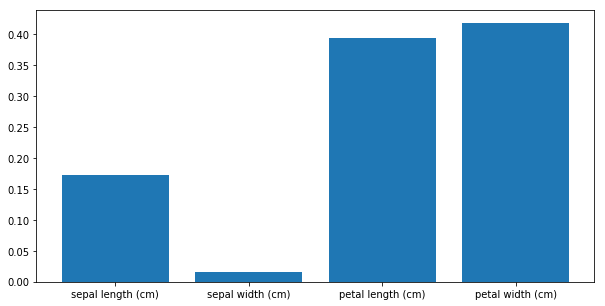

In [84]:
plt.figure(figsize=(10,5))
plt.bar(iris.feature_names, clf_rf.feature_importances_)
plt.show()

Confusion matrix, without normalization
[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]
Normalized confusion matrix
[[1.     0.     0.    ]
 [0.     1.     0.    ]
 [0.     0.0625 0.9375]]


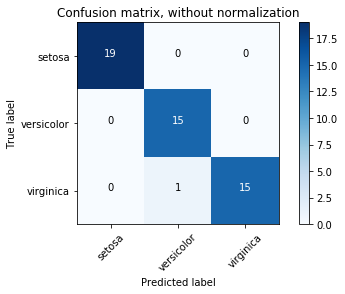

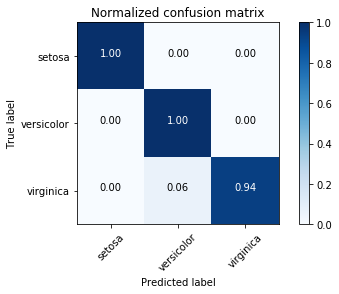

In [0]:
cm_rf =  confusion_matrix(y_test, y_test_est_rf)
plt.figure()
plot_confusion_matrix(cm_rf, classes= iris.target_names, title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(cm_rf, classes= iris.target_names, normalize=True, title='Normalized confusion matrix')


## 梯度提升树

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

# 构建梯度提升树 
clf_gbt = GradientBoostingClassifier(random_state=0)
clf_gbt.fit(X_train, y_train)
y_test_est_gbt = clf_rf.predict(X_test)

In [89]:
# 输出混淆矩阵
pd.crosstab(y_test, y_test_est_gbt, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,0,1,2
Actual Species,,,
0,16,0,0
1,0,18,1
2,0,3,12


In [90]:
# 查看特征重要性
print(clf_gbt.feature_importances_)

[0.00613481 0.01124639 0.34043091 0.64218788]


Confusion matrix, without normalization
[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]
Normalized confusion matrix
[[1.     0.     0.    ]
 [0.     1.     0.    ]
 [0.     0.0625 0.9375]]


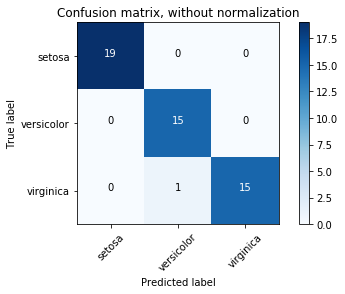

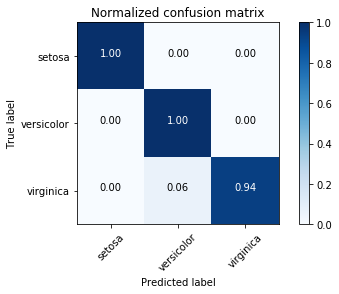

In [0]:
cm_gbt =  confusion_matrix(y_test, y_test_est_gbt)
plt.figure()
plot_confusion_matrix(cm_gbt, classes= iris.target_names, title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(cm_gbt, classes= iris.target_names, normalize=True, title='Normalized confusion matrix')

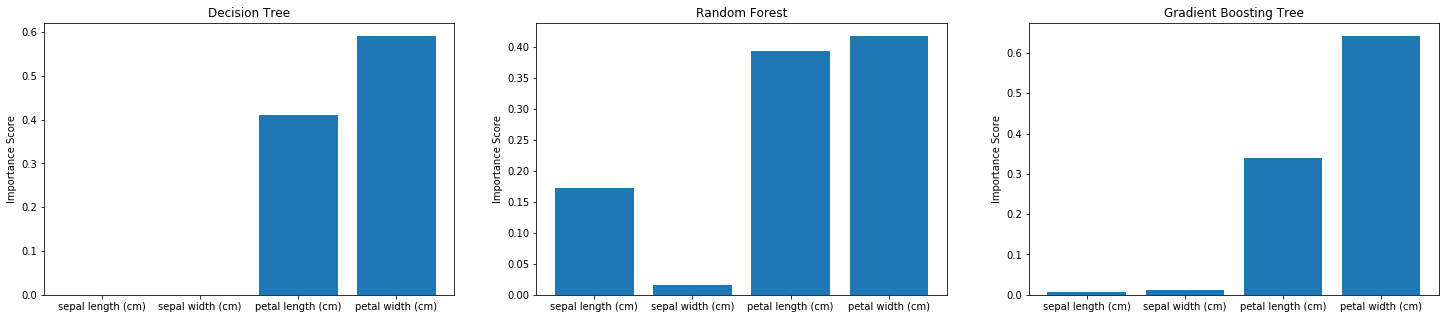

In [91]:
from pylab import *

f = plt.figure(figsize=(25, 5))
ax = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

ax.bar(iris.feature_names, clf_dt.feature_importances_)
ax.set_title('Decision Tree')
ax.set_ylabel('Importance Score')

ax2.bar(iris.feature_names, clf_rf.feature_importances_)
ax2.set_title('Random Forest')
ax2.set_ylabel('Importance Score')

ax3.bar(iris.feature_names, clf_gbt.feature_importances_)
ax3.set_title('Gradient Boosting Tree')
ax3.set_ylabel('Importance Score')

plt.show()